In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
#Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
#Load the dataset
print("Loading Reddit Sarcasm Dataset...")
df_reddit = pd.read_csv('train-balanced-sarcasm.csv')

Loading Reddit Sarcasm Dataset...


In [9]:
print(f"✅ Loaded {len(df_reddit):,} samples")
print(f"Columns: {df_reddit.columns.tolist()}")

✅ Loaded 1,010,826 samples
Columns: ['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment']


In [11]:
print("Dataset shape:", df_reddit.shape)
print("\nColumn names:")
print(df_reddit.columns.tolist())
print("\nFirst 5 rows:")
print(df_reddit.head())
print("\nData types:")
print(df_reddit.dtypes)
print("\nMissing values:")
print(df_reddit.isnull().sum())

Dataset shape: (1010826, 10)

Column names:
['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment']

First 5 rows:
   label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimat

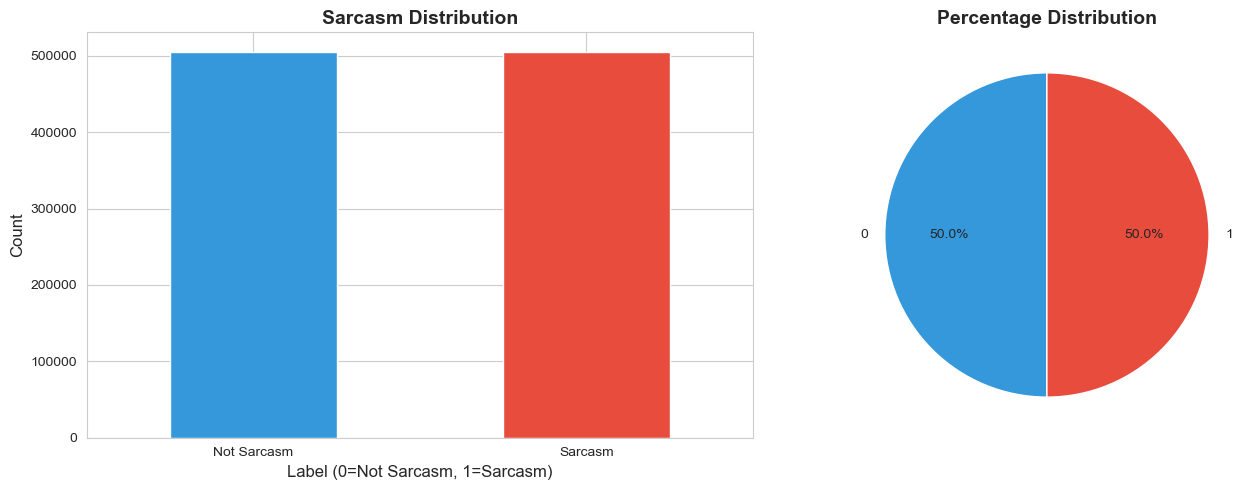


📊 Dataset is balanced: 505413 non-sarcastic, 505413 sarcastic


In [12]:
# Plot label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
df_reddit['label'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Sarcasm Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label (0=Not Sarcasm, 1=Sarcasm)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Not Sarcasm', 'Sarcasm'], rotation=0)

# Pie chart
df_reddit['label'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                        colors=['#3498db', '#e74c3c'], startangle=90)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n📊 Dataset is balanced: {df_reddit['label'].value_counts()[0]} non-sarcastic, {df_reddit['label'].value_counts()[1]} sarcastic")

In [13]:
print("="*60)
print("SAMPLE SARCASTIC COMMENTS")
print("="*60)

sarcastic_samples = df_reddit[df_reddit['label'] == 1].sample(5)
for i, (idx, row) in enumerate(sarcastic_samples.iterrows(), 1):
    print(f"\n{i}. {row['comment']}")
    print(f"   Subreddit: r/{row['subreddit']} | Score: {row['score']}")

print("\n" + "="*60)
print("SAMPLE NON-SARCASTIC COMMENTS")
print("="*60)

non_sarcastic_samples = df_reddit[df_reddit['label'] == 0].sample(5)
for i, (idx, row) in enumerate(non_sarcastic_samples.iterrows(), 1):
    print(f"\n{i}. {row['comment']}")
    print(f"   Subreddit: r/{row['subreddit']} | Score: {row['score']}")

SAMPLE SARCASTIC COMMENTS

1. Only fat white women
   Subreddit: r/BlackPeopleTwitter | Score: 18

2. Obviously Immunity is a difficult opponent which allows Vox to grow past teams like Cloud 9, Liquid, CLG etc., who have no good teams to play against
   Subreddit: r/GlobalOffensive | Score: 3

3. Obviously a jackdaw.
   Subreddit: r/videos | Score: 0

4. So *this* is why car doors lock immediately upon my arrival.
   Subreddit: r/AskWomen | Score: 3

5. Whaaaat, but I've been told of America outlaws guns too we would see 0 events like this
   Subreddit: r/AskReddit | Score: -1

SAMPLE NON-SARCASTIC COMMENTS

1. They're extremely unbiased and it's so weird.
   Subreddit: r/nba | Score: 1

2. Shadowplay has no loss in fps for recording
   Subreddit: r/Competitiveoverwatch | Score: 4

3. The scary part is there are tons of people here defending Riot
   Subreddit: r/leagueoflegends | Score: -1

4. Or they just hate self righteous douchebags like you and the previous commenter.
   Subreddi

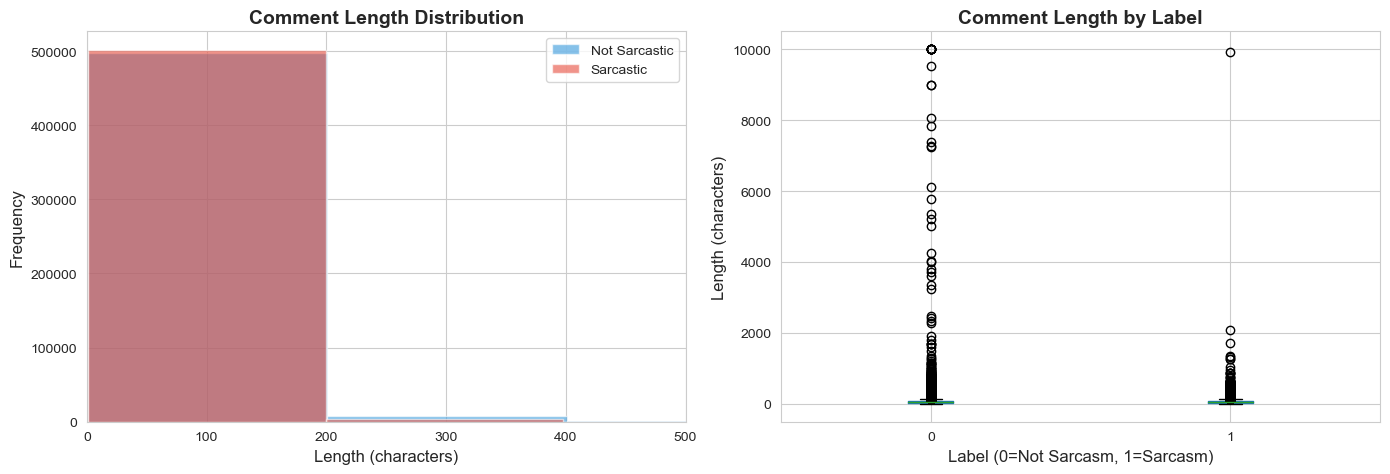


Average length - Not Sarcastic: 56.9 chars
Average length - Sarcastic: 56.4 chars


In [14]:
# Analyze comment lengths
df_reddit['comment_length'] = df_reddit['comment'].str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Length distribution by label
df_reddit[df_reddit['label']==0]['comment_length'].hist(bins=50, alpha=0.6, 
                                                          label='Not Sarcastic', 
                                                          color='#3498db', ax=axes[0])
df_reddit[df_reddit['label']==1]['comment_length'].hist(bins=50, alpha=0.6, 
                                                          label='Sarcastic', 
                                                          color='#e74c3c', ax=axes[0])
axes[0].set_title('Comment Length Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].set_xlim(0, 500)

# Box plot
df_reddit.boxplot(column='comment_length', by='label', ax=axes[1])
axes[1].set_title('Comment Length by Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label (0=Not Sarcasm, 1=Sarcasm)', fontsize=12)
axes[1].set_ylabel('Length (characters)', fontsize=12)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

print(f"\nAverage length - Not Sarcastic: {df_reddit[df_reddit['label']==0]['comment_length'].mean():.1f} chars")
print(f"Average length - Sarcastic: {df_reddit[df_reddit['label']==1]['comment_length'].mean():.1f} chars")

TOP 10 SUBREDDITS IN DATASET
subreddit
AskReddit          65677
politics           39496
worldnews          26377
leagueoflegends    21037
pcmasterrace       18988
funny              17939
news               16891
pics               16154
todayilearned      14161
nfl                14150
Name: count, dtype: int64


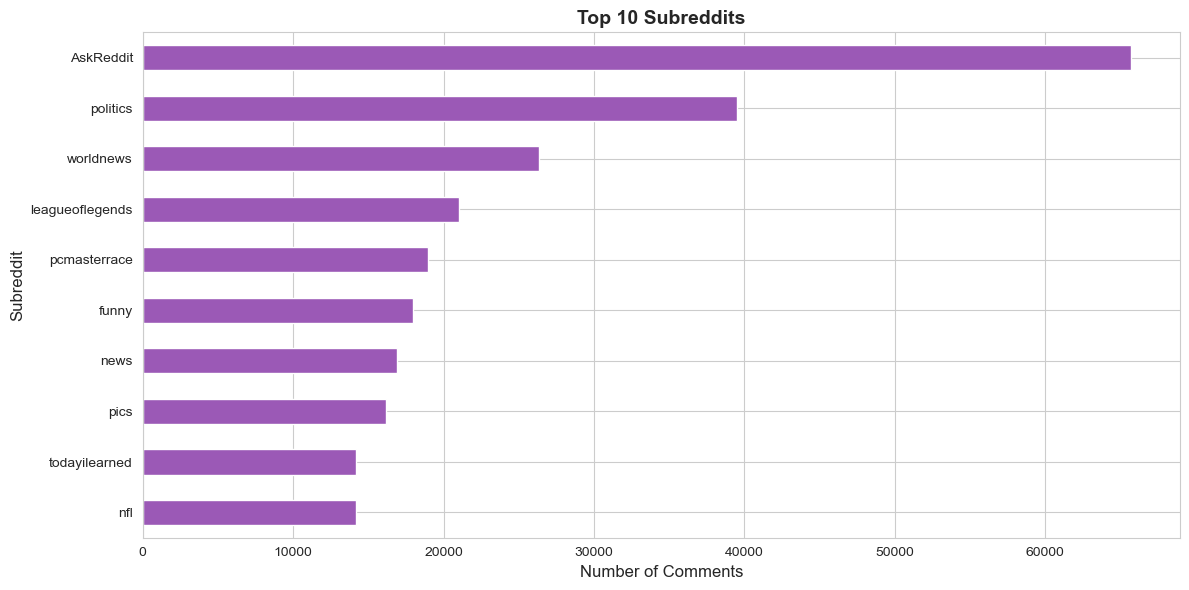

In [15]:
# Top subreddits
print("="*60)
print("TOP 10 SUBREDDITS IN DATASET")
print("="*60)

top_subreddits = df_reddit['subreddit'].value_counts().head(10)
print(top_subreddits)

# Visualize
plt.figure(figsize=(12, 6))
top_subreddits.plot(kind='barh', color='#9b59b6')
plt.title('Top 10 Subreddits', fontsize=14, fontweight='bold')
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Subreddit', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()